In [74]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
%autoreload 2

In [76]:
import aligater as ag

In [77]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/", lFilter=["B cell"])

Collected 3022 files, 6347 files did not pass filter(s) and mask(s).

In [78]:
fcsDF = ag.loadFCS(fcsList[1600], compensate=True)

Opening file B cells_E5_E05_032 from folder /17-03-2016/plate 2
Loaded dataset with 500000 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 

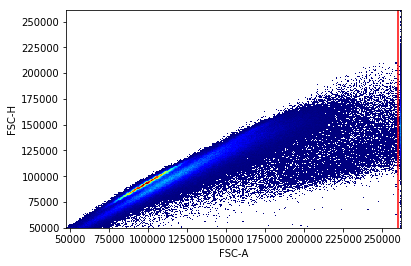

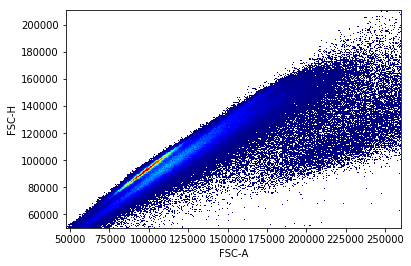

After gating, 487823 out of 500000 events remain.

In [79]:
no_clutter=ag.gateThreshold(fcsDF,"FSC-A", "FSC-H",thresh=260000, orientation='horisontal',population="lower")

After gating, 464056 out of 487823 events remain.

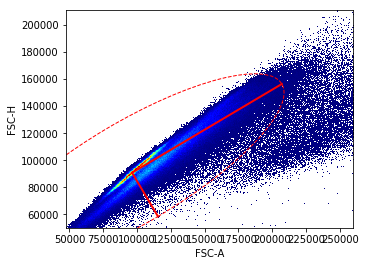

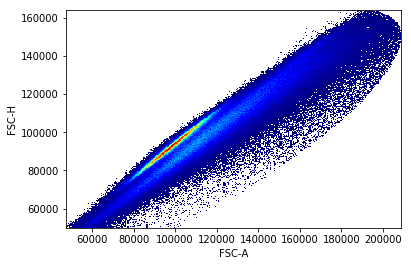

In [80]:
singlets=ag.gatePC(fcsDF,"FSC-A", "FSC-H",center='density',widthScale=3, heightScale=4, vI=no_clutter, plot=True)

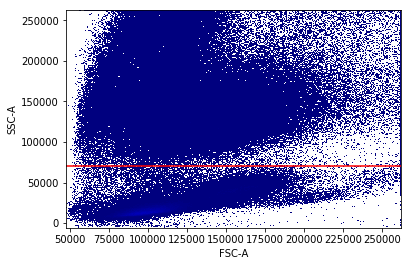

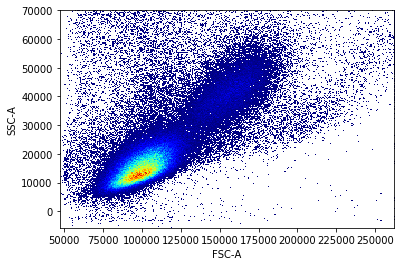

After gating, 183277 out of 500000 events remain.

In [81]:
PBMCstep1=ag.gateThreshold(fcsDF,xCol="FSC-A",yCol="SSC-A",orientation="vertical",thresh=70000,population="lower")

After gating, 169887 out of 183277 events remain.

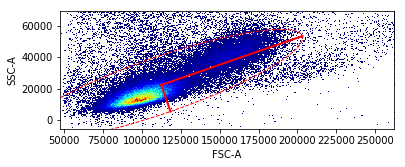

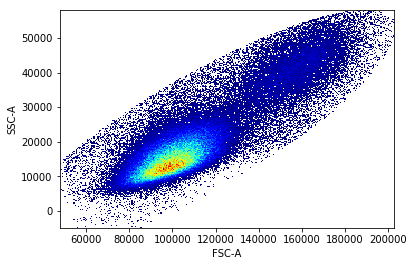

In [82]:
PBMC=ag.gatePC(fcsDF,"FSC-A","SSC-A",center='centroid',widthScale=3, heightScale=2, vI=PBMCstep1, plot=True)

In [83]:
mean, sigma, maxVal=ag.axisStats(fcsDF, "CD34", PBMC)
sigma*3

3059.1165746734628

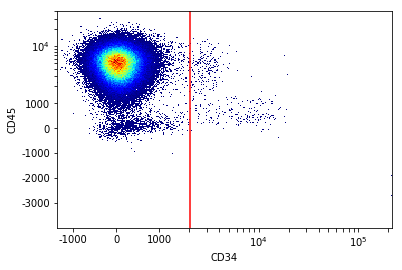

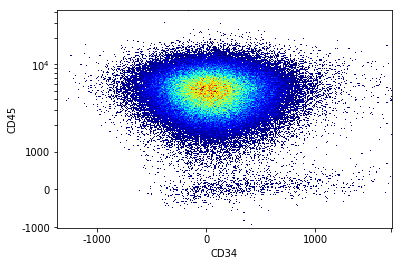

After gating, 169342 out of 169887 events remain.

In [84]:
CD45step1 = ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='horisontal', vI=PBMC,population="lower",thresh=(2*sigma), scale='logish')

In [85]:
lim = ag.valleySeek(fcsDF, "CD45",vI=CD45step1,interval=[0,2500],sigma=2,bins=1000)

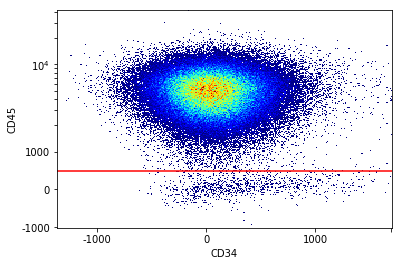

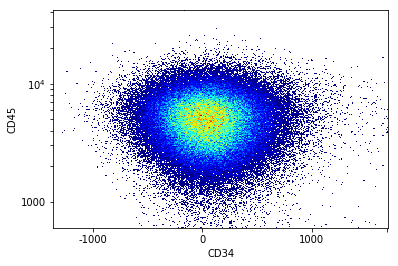

After gating, 167871 out of 169342 events remain.

In [86]:
CD45pos = ag.gateThreshold(fcsDF, "CD34", "CD45", vI=CD45step1, orientation='vertical',thresh=lim,scale='logish') 

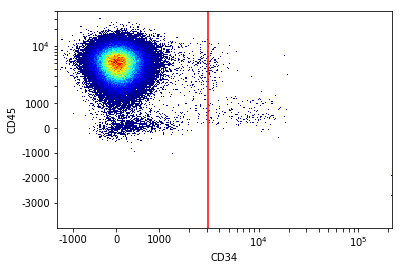

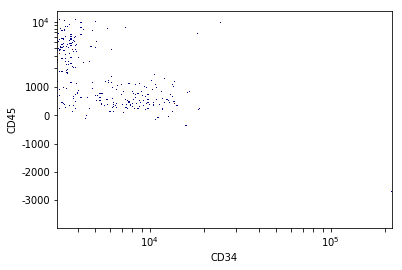

After gating, 344 out of 169887 events remain.

In [87]:
CD34step1=ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='horisontal', vI=PBMC,population="upper",thresh=(3*sigma), scale='logish')

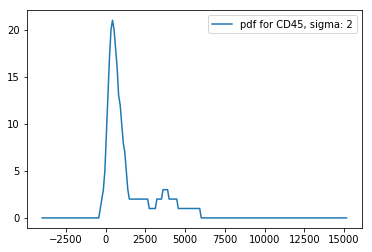

In [88]:
ag.plot_densityFunc(fcsDF,"CD45", vI=CD34step1,sigma=2,bins=200)

In [89]:
lim=ag.valleySeek(fcsDF, "CD45",vI=CD34step1,interval=[500,2500],sigma=2,bins=200)
lim

1512.1320654125261

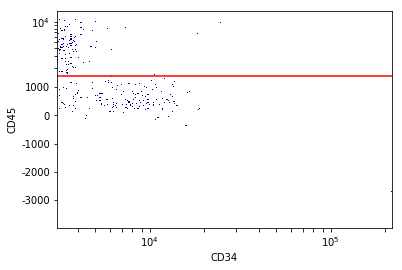

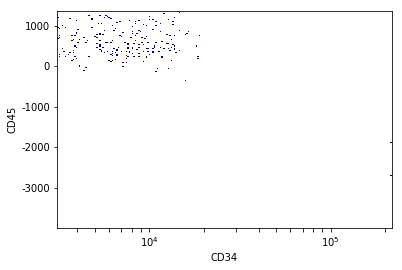

After gating, 215 out of 344 events remain.

In [90]:
CD34pos=ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='vertical', vI=CD34step1,population="lower",thresh=lim, scale='logish')

(<matplotlib.figure.Figure at 0x7feffd6c4eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feffd627710>)

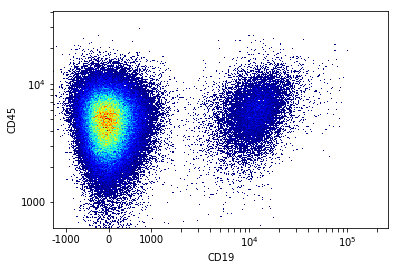

In [91]:
ag.plotHeatmap(fcsDF, "CD19","CD45",vI=CD45pos,scale='logish')

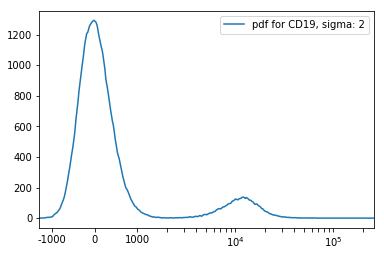

In [92]:
ag.plot_densityFunc(fcsDF,xCol="CD19",vI=CD45pos, bins=1000, sigma=2, scale='logish')

In [93]:
lim=ag.valleySeek(fcsDF,xCol="CD19",vI=CD45pos,interval=[0,2000],bins=1000,sigma=2, scale='logish')

In [94]:
lim

1788.2698240792188

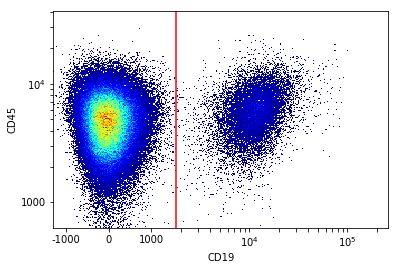

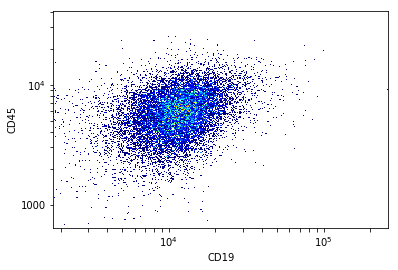

After gating, 17778 out of 167871 events remain.

In [95]:
CD19pos=ag.gateThreshold(fcsDF,"CD19","CD45",vI=CD45pos,thresh=lim,scale='logish',orientation='horisontal',population='upper')

(<matplotlib.figure.Figure at 0x7feffd2f44a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feffd7a25f8>)

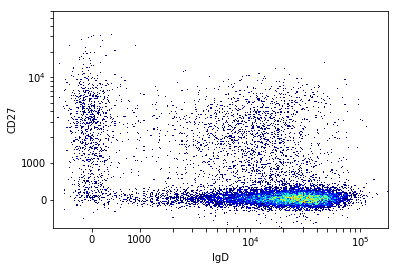

In [96]:
ag.plotHeatmap(fcsDF, "IgD", "CD27", vI=CD19pos,scale="logish",bins=300)

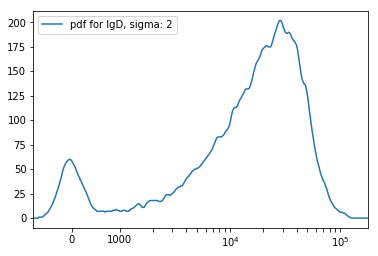

In [97]:
ag.plot_densityFunc(fcsDF,"IgD", CD19pos,bins=300,sigma=2, scale='logish')

In [98]:
xlim=ag.valleySeek(fcsDF,"IgD", CD19pos, interval=[0,4000],bins=300,sigma=2, scale='logish')

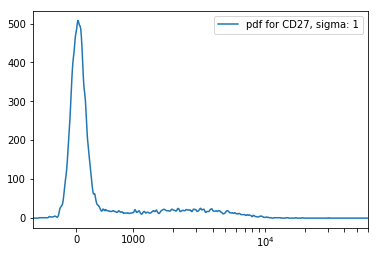

In [99]:
ag.plot_densityFunc(fcsDF,"CD27", CD19pos,bins=500,sigma=1, scale='logish')

In [100]:
ylim=ag.valleySeek(fcsDF,"CD27", CD19pos, interval=[0,4000],bins=300,sigma=2, scale='logish')

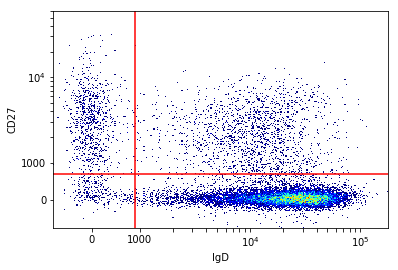

In [118]:
switchB, preSwitchB, naiveB, exhaustedB = ag.quadGate(fcsDF,"IgD","CD27",vI=CD19pos,xThresh=xlim,yThresh=ylim, scale='logish')

(<matplotlib.figure.Figure at 0x7feffc1c7e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feffd5ac8d0>)

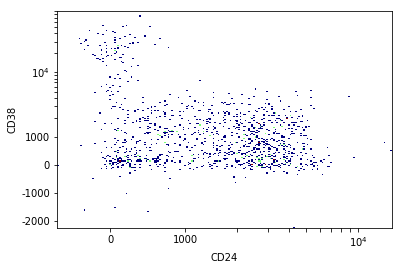

In [122]:
ag.plotHeatmap(fcsDF, "CD24", "CD38", switchB, scale='logish', bins=200)

In [123]:
mean, sigma, maxVal = ag.axisStats(fcsDF, "CD38", vI=switchB)

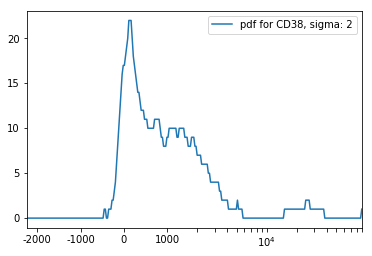

In [124]:
ag.plot_densityFunc(fcsDF,"CD38",switchB,scale='logish',bins=300,sigma=2)

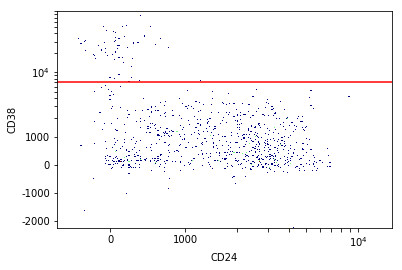

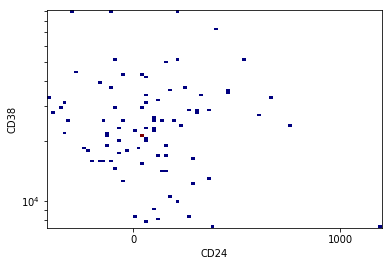

After gating, 86 out of 1150 events remain.

In [125]:
plasmablasts=ag.gateThreshold(fcsDF, "CD24", "CD38", vI=switchB, thresh=mean+0.5*sigma, orientation='vertical', population='upper',scale='logish')

In [130]:
xmean,xsigma,xmaxVal = ag.axisStats(fcsDF,xCol="CD24",vI=naiveB)

In [131]:
ymean,ysigma,ymaxVal = ag.axisStats(fcsDF,xCol="CD38",vI=naiveB)

horisontal line at y: 3278.84288349
vertical line line at x: 440.663859851


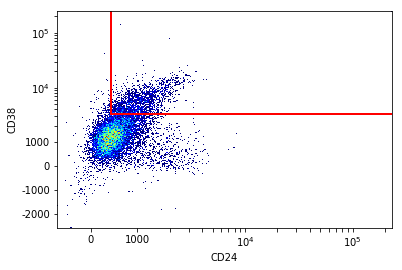

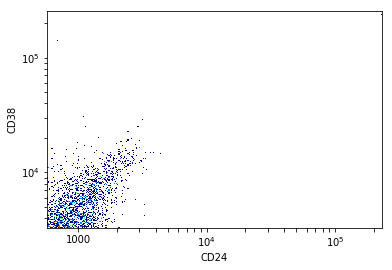

After gating, 2410 out of 14021 events remain.

In [132]:
transitionals=ag.gateCorner(fcsDF,"CD24", "CD38",xThresh = xmaxVal, yThresh=ymaxVal+2000, vI=naiveB, scale='logish')

In [133]:
lim = ag.valleySeek(fcsDF,"IgA",vI=switchB,interval=[750,2000],bins=300, sigma=0, scale='logish')
lim

765.37622894543779

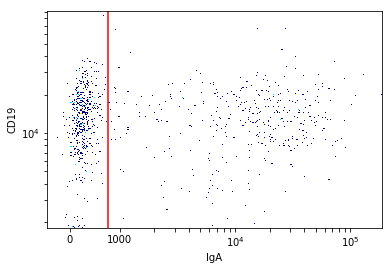

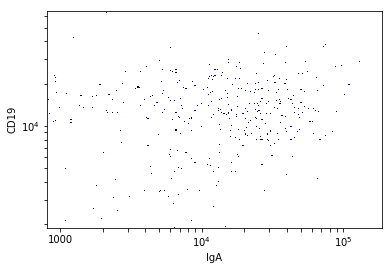

After gating, 495 out of 1150 events remain.

In [134]:
IgApos=ag.gateThreshold(fcsDF, "IgA","CD19", vI=switchB, thresh=lim, scale='logish')